In [ ]:
import numpy as np
from numpy import argmax
import pandas as pd
import tensorflow
import cv2
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
im_width = 64
im_height = 64
Label=[]
data=[]

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator=train_datagen.flow_from_directory('C:\\Users\\Grace\\Downloads\\MS-DS\\Stat. and Math. Methods in Data Science\\Assignment 08\\DermCNN data\\', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode='categorical',shuffle=True)

DATADIR = "C:\\Users\\Grace\\Downloads\\MS-DS\\Stat. and Math. Methods in Data Science\\Assignment 08\\DermCNN data\\"
CATEGORIES = ["1", "2","3","4","5","6","7"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        new_array = (cv2.resize(img_array, (im_width, im_height)))
        Label.append(category)
        data.append((new_array/255))
           

data=data[0:800]+data[2000:2364]
Label=Label[0:800]+Label[2000:2364]
data=np.array(data)
Label=np.array(Label)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Label)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)
data = data.reshape((data.shape)[0], (data.shape)[1], (data.shape)[2], 1)
X_train, X_test, y_train, y_test = train_test_split(data, onehot_encoded, test_size=0.2)
print(data.shape)
print(onehot_encoded.shape)

Found 2364 images belonging to 7 classes.
(1164, 64, 64, 1)
(1164, 7)


C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 62, 62, 10)        5770      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 31, 31, 3)         273       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 31, 31, 5)         380       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7, 7, 10)          210       
__________

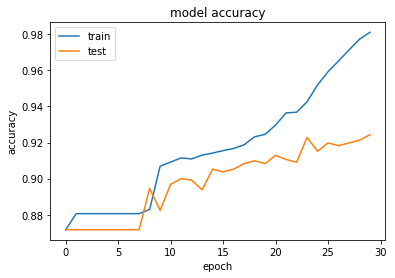

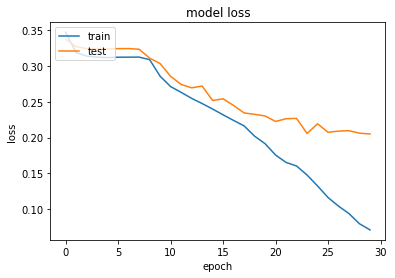

233/233 [==============================] - 2s 10ms/step
Accuracy on the Test Images:  0.9227468128368067


In [12]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=64,input_shape=(im_width, im_height, 1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Dense(70,activation="sigmoid"))
model.add(Flatten())
model.add(Dropout(0.20))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(7,activation="softmax"))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

#checkpoint = ModelCheckpoint(filepath='scratchmodel.best.hdf5', verbose=1,save_best_only=True)

history=model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1,validation_split=0.2, shuffle=True)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Evaluate the model on the test data
score = model.evaluate(X_test, y_test)

#Accuracy on test data
print('Accuracy on the Test Images: ', score[1])